# Visualizações Básicas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import stemgraphic

## 1. Pressão Sistólica

In [2]:
#Carregando dados
pressao = pd.read_csv('BloodPressure01.txt')
pressao = pressao.iloc[:, :18]
pressao.head()

,sbp,gender,married,smoke,exercise,age,weight,height,overwt,race,alcohol,trt,bmi,stress,salt,chldbear,income,educatn
0,133,F,N,N,3,60,159,56,3,1,2,0,35,2,2,2,2,2
1,115,M,N,Y,1,55,107,65,1,1,2,0,17,2,2,1,3,2
2,140,M,N,Y,1,18,130,59,2,1,1,0,26,3,2,1,1,3
3,132,M,Y,N,2,19,230,57,3,2,3,1,49,3,3,1,1,2
4,133,M,N,N,2,58,201,74,2,1,3,0,25,2,2,1,2,3


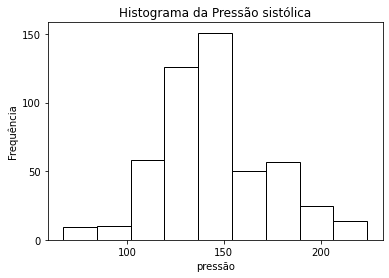

In [3]:
#Configurações visuais
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)


#Plotando histograma básico
plt.hist(pressao['sbp'], bins=9, color='white', edgecolor='black')
plt.xlabel('pressão')
plt.ylabel('Frequência')
plt.title('Histograma da Pressão sistólica')
plt.show()

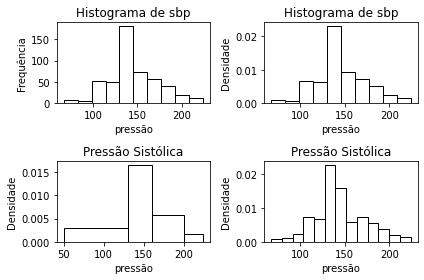

In [4]:
#Plotando os outros histogramas

#Histograma de frequência
plt.subplot(2, 2, 1)
plt.hist(pressao['sbp'], color='white', edgecolor='black')
plt.xlabel('pressão')
plt.ylabel('Frequência')
plt.title('Histograma de sbp')

#Histograma com probabilidade 
plt.subplot(2, 2, 2)
plt.hist(pressao['sbp'], color='white', edgecolor='black', density=True)
plt.xlabel('pressão')
plt.ylabel('Densidade')
plt.title('Histograma de sbp')

#Histograma delimitando largura das barras
plt.subplot(2, 2, 3)
plt.hist(pressao['sbp'], bins=[50, 130, 160, 200, pressao['sbp'].max()], density=True, color='white', edgecolor='black')
plt.xlabel('pressão')
plt.ylabel('Densidade')
plt.title('Pressão Sistólica')

#Histograma aumentando quantidade de barras
plt.subplot(2, 2, 4)
plt.hist(pressao['sbp'], bins=13, color='white', edgecolor='black', density=True)
plt.xlabel('pressão')
plt.ylabel('Densidade')
plt.title('Pressão Sistólica')

plt.tight_layout()
plt.show()

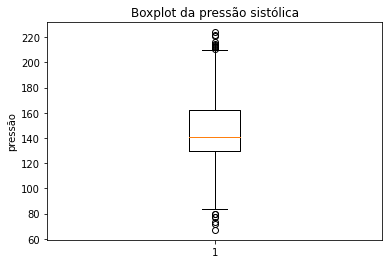

In [5]:
#Plotando Boxplot da pressão Sistólica
plt.boxplot(pressao['sbp'])
plt.title('Boxplot da pressão sistólica')
plt.ylabel('pressão')
plt.show()

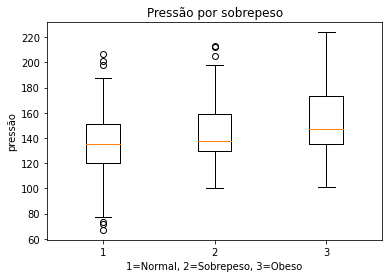

In [6]:
#Boxplot da pressão sistólica para cada tipo de peso

normal = pressao[pressao['overwt']==1]['sbp']
overweight = pressao[pressao['overwt']==2]['sbp']
obese = pressao[pressao['overwt']==3]['sbp']

plt.boxplot([normal, overweight, obese])
plt.title('Pressão por sobrepeso')
plt.xlabel('1=Normal, 2=Sobrepeso, 3=Obeso')
plt.ylabel('pressão')
plt.show()

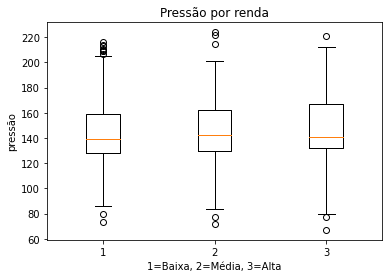

In [7]:
#Boxplot da pressão sistólica por renda

low = pressao[pressao['income']==1]['sbp']
middle = pressao[pressao['income']==2]['sbp']
high = pressao[pressao['income']==3]['sbp']

plt.boxplot([low, middle, high])
plt.title('Pressão por renda')
plt.xlabel('1=Baixa, 2=Média, 3=Alta')
plt.ylabel('pressão')
plt.show()

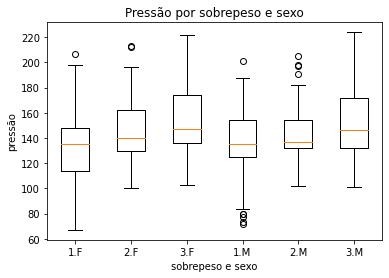

In [8]:
#Boxplot da pressão sistólica por sobrepeso e sexo
Fnormal = pressao[(pressao['overwt']==1) & (pressao['gender']=='F')]['sbp']
Foverweight = pressao[(pressao['overwt']==2) & (pressao['gender']=='F')]['sbp']
Fobese = pressao[(pressao['overwt']==3) & (pressao['gender']=='F')]['sbp']

Mnormal = pressao[(pressao['overwt']==1) & (pressao['gender']=='M')]['sbp']
Moverweight = pressao[(pressao['overwt']==2) & (pressao['gender']=='M')]['sbp']
Mobese = pressao[(pressao['overwt']==3) & (pressao['gender']=='M')]['sbp']

boxlabels = ['1.F', '2.F', '3.F', '1.M', '2.M', '3.M']
plt.boxplot([Fnormal, Foverweight, Fobese, Mnormal, Moverweight, Mobese], labels=boxlabels)
plt.title('Pressão por sobrepeso e sexo')
plt.xlabel('sobrepeso e sexo')
plt.ylabel('pressão')
plt.show()

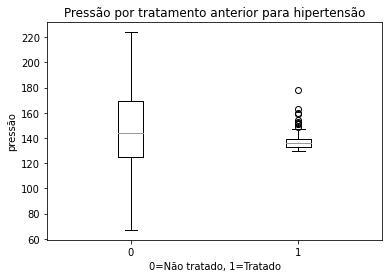

In [9]:
#Boxplot da pressão por tratamento

untreated = pressao[pressao['trt']==0]['sbp']
treated = pressao[pressao['trt']==1]['sbp']

plt.boxplot([untreated, treated], labels=['0', '1'])
plt.title('Pressão por tratamento anterior para hipertensão')
plt.xlabel('0=Não tratado, 1=Tratado')
plt.ylabel('pressão')
plt.show()

## 2. População por Município

In [10]:
#Carregando dados
pop = pd.read_csv('POP2006.csv', encoding='latin1')  #arquivo não está em UTF-8
pop.head()

,ESTADO,MUNICIPIO,POP2006
0,RO,Alta Floresta D'Oeste,29005
1,RO,Alto Alegre dos Parecis,15454
2,RO,Alto Paraíso,16510
3,RO,Alvorada D'Oeste,19542
4,RO,Ariquemes,86924


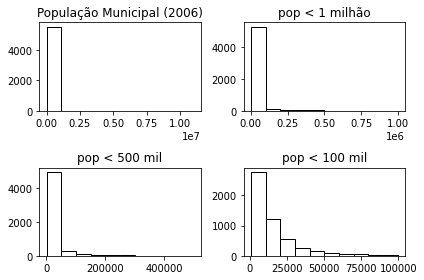

In [11]:
#Plotando os outros histogramas

#Histograma de frequência
plt.subplot(2, 2, 1)
plt.hist(pop['POP2006'], color='white', edgecolor='black')
plt.title('População Municipal (2006)')

#Histograma com probabilidade 
plt.subplot(2, 2, 2)
plt.hist(pop['POP2006'].where(pop['POP2006'] < 1000000), color='white', edgecolor='black')
plt.title('pop < 1 milhão')

#Histograma delimitando largura das barras
plt.subplot(2, 2, 3)
plt.hist(pop['POP2006'].where(pop['POP2006'] < 500000), color='white', edgecolor='black')
plt.title('pop < 500 mil')

#Histograma aumentando quantidade de barras
plt.subplot(2, 2, 4)
plt.hist(pop['POP2006'].where(pop['POP2006'] < 100000), color='white', edgecolor='black')
plt.title('pop < 100 mil')

plt.tight_layout()
plt.show()

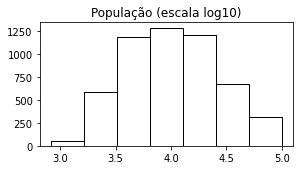

In [12]:
#Logaritmo da população
plt.figure(figsize=(10,5))
plt.subplot(2, 2, 1)
plt.hist(np.log10(pop['POP2006'].where(pop['POP2006'] < 100000)), bins=7, color='white', edgecolor='black')
plt.title('População (escala log10)')

plt.show()

## 3. Campeonato Brasileiro

In [13]:
#Carregando dados
bras = pd.read_csv('CampeonatoBrasileiro2014.txt') 
bras.head()

,Time,\tPts,\tJogos,\tVit,\tEmp,\tDer,\tGols,\tGolsSofr,\tSaldoGols,\tAprov
0,Cruzeiro,80,38,24,8,6,67,38,29,70
1,Sao Paulo,70,38,20,10,8,59,40,19,61
2,Internacional,69,38,21,6,11,53,41,12,60
3,Corinthians,69,38,19,12,7,49,31,18,60
4,Atletico Mineiro,62,38,17,11,10,51,38,13,54


(<Figure size 540x234 with 1 Axes>, <Axes: >)

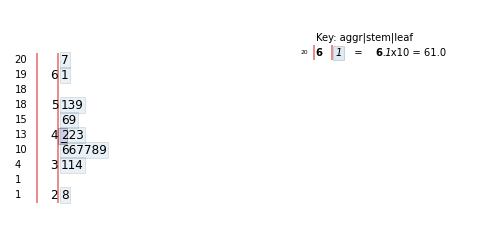

In [14]:
#Stem and leafs
stemgraphic.stem_graphic(sorted(bras['\tGols']))

(<Figure size 540x270 with 1 Axes>, <Axes: >)

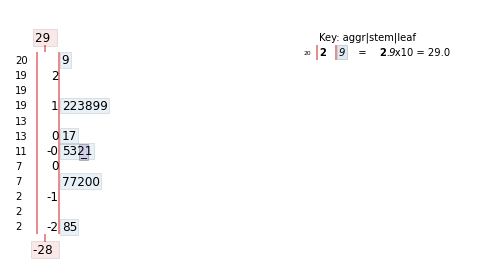

In [15]:
stemgraphic.stem_graphic(sorted(bras['\tSaldoGols']))

(<Figure size 540x414 with 1 Axes>, <Axes: >)

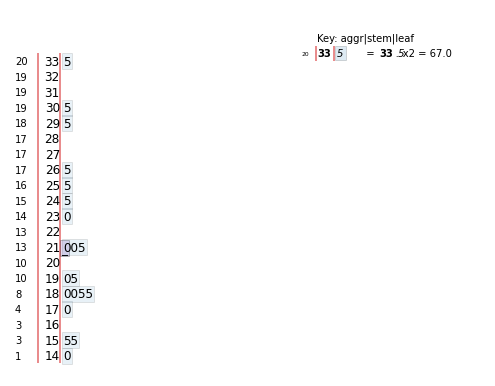

In [16]:
stemgraphic.stem_graphic(sorted(bras['\tGols']), scale=2)

## 4. Dados de carros

In [17]:
cars = pd.read_csv('mtcars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


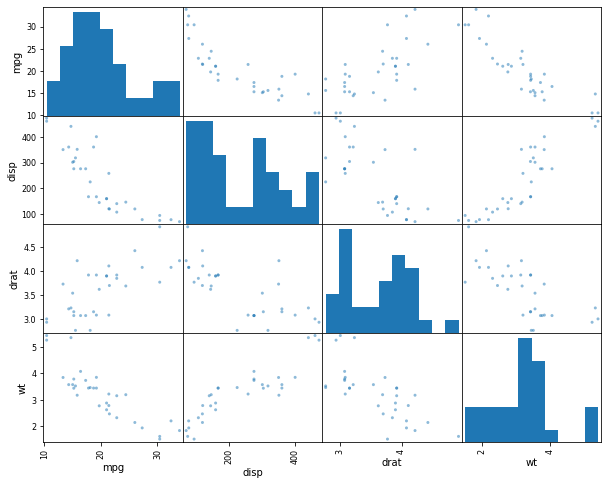

In [18]:
#Plotando matrix de dispersão

pd.plotting.scatter_matrix(cars[['mpg', 'disp', 'drat', 'wt']], figsize=(10,8))
plt.show()